<a href="https://colab.research.google.com/github/AshishDagarASD/ML_practice/blob/master/MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load data**

In [0]:
from keras.datasets import fashion_mnist

In [15]:
(X_train,y_train),(X_test,y_test)= fashion_mnist.load_data()

print("the training set has %d examples."%len(X_train))
print("the testing set has %d examples."%len(X_test))

the training set has 60000 examples.
the testing set has 10000 examples.


**2. Visualize the data**

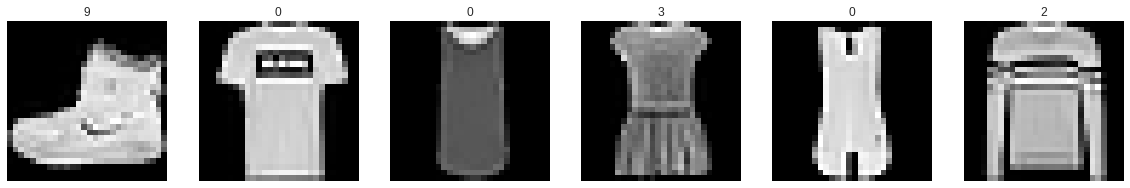

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
import pandas as pd

fig=plt.figure(figsize=(20,20))
for i in range(6):
  ax=fig.add_subplot(2 ,6 ,i+1,xticks=[],yticks=[])
  ax.imshow(X_train[i] , cmap='gray')
  ax.set_title(str(y_train[i]))

**Just for Understanding**

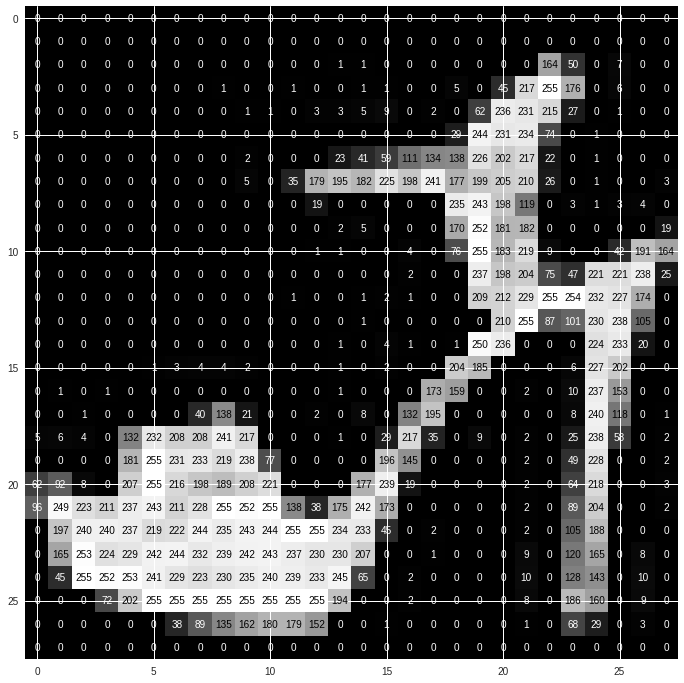

In [17]:
def visualize_image(img,ax):
  ax.imshow(img,cmap='gray')
  width,hight=img.shape
  thresh=img.max()/2.5
  for x in range(width):
    for y in range(hight):
      ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig=plt.figure(figsize=(12,12))
ax= fig.add_subplot(111)
visualize_image(X_train[9],ax)

**3. Rescale the data** by dividing by 255 to get every pixels value 0/1

In [18]:
X_train.astype("float32")/255
X_test.astype("float32")/255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

# **4. One Hot Encodging**  
## all the lables are categorically seperated

In [19]:
from keras.utils import np_utils

# one hot encoding
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

print("one hot lables:")
print(y_train[:10])

one hot lables:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [20]:
X_train.shape

(60000, 28, 28)

# 5.Defination of model architecture

In [21]:
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Dense,Dropout,Flatten

# model defination

model=Sequential()
model.add(Conv1D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(28, 28)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))


model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 28, 16)            912       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 14, 16)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 14, 32)            1056      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 7, 64)             4160      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 64)             0         
__________

**Compileation of model** 

In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer='rmsprop',
              metrics=['accuracy'])


## **Testing accuracy of model before Training **

In [23]:
score=model.evaluate(X_test,y_test,verbose=1)
accuracy=100*score[1]

print('Test accuracy: %.4f%%' % accuracy)


10000/10000 [==============================] - 1s 86us/step
Test accuracy: 22.8100%


# 6.Training the model

In [24]:
from keras.callbacks import ModelCheckpoint

checkpointer= ModelCheckpoint(filepath='somthing.but.dont.know',
                             verbose=1,
                             save_best_only=True)
hist=model.fit(X_train,
               y_train,
              batch_size=128,
              epochs=30,
              validation_split=0.2,
              callbacks=[checkpointer],
              verbose=1,
              shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 70us/step - loss: 5.9742 - acc: 0.5317 - val_loss: 0.6277 - val_acc: 0.7821

Epoch 00001: val_loss improved from inf to 0.62768, saving model to somthing.but.dont.know
Epoch 2/30
48000/48000 [==============================] - 3s 63us/step - loss: 0.6475 - acc: 0.7749 - val_loss: 0.4937 - val_acc: 0.8233

Epoch 00002: val_loss improved from 0.62768 to 0.49366, saving model to somthing.but.dont.know
Epoch 3/30
48000/48000 [==============================] - 3s 63us/step - loss: 0.5264 - acc: 0.8126 - val_loss: 0.4526 - val_acc: 0.8385

Epoch 00003: val_loss improved from 0.49366 to 0.45256, saving model to somthing.but.dont.know
Epoch 4/30
48000/48000 [==============================] - 3s 64us/step - loss: 0.4832 - acc: 0.8263 - val_loss: 0.4344 - val_acc: 0.8418

Epoch 00004: val_loss improved from 0.45256 to 0.43439, saving model to somthing.but.dont.know
Epoch 5/30
48000/48000

**Saving the best weights**

In [0]:
model.load_weights("somthing.but.dont.know")

## Calculating final accuracy on test set

In [26]:
score=model.evaluate(X_test,y_test,verbose=0)
new_accuracy=100*score[1]


print('Test accuracy: %.4f%%' % new_accuracy)

Test accuracy: 85.8700%
